In [1]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import numpy as np  # For numerical operations and random number generation
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating visualizations (e.g., plots, charts)
import seaborn as sns  # For statistical data visualization (e.g., heatmaps, barplots)
import os  # For interacting with the operating system (e.g., managing environment variables)
import random  # For generating random numbers


In [2]:
# Load the dataset from the given path into a DataFrame using pandas' read_csv function
df = pd.read_csv("C:\\Users\\acer\\Desktop\\Machine Learning\\Classification\\dataset2.csv")  # Reading the dataset from the specified path

# Print the entire dataset to inspect the contents (this might be large, so it's usually best to view a snippet)
print(df)



# Drop the 'UDI' and 'Product ID' columns from the DataFrame as they are not needed for further analysis or modeling
df = df.drop(columns=["UDI", "Product ID"], axis=1)  # Drop specific columns (axis=1 means columns)
df_backup = df.copy()  # Create a backup of the DataFrame for future use or comparison

# Print the DataFrame after dropping columns to verify the changes
print(df_backup)



# Display the first few rows of the dataset (default 5 rows) to get an overview of the data
df.head()

# Display the last few rows of the dataset (default 5 rows) to ensure data consistency and check the end of the dataset
df.tail()

# Generate summary statistics of the dataset to understand the distribution of numerical features
df.describe()  # This provides count, mean, std, min, max, and percentiles of numerical columns


        UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0    

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.034800
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.183282
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


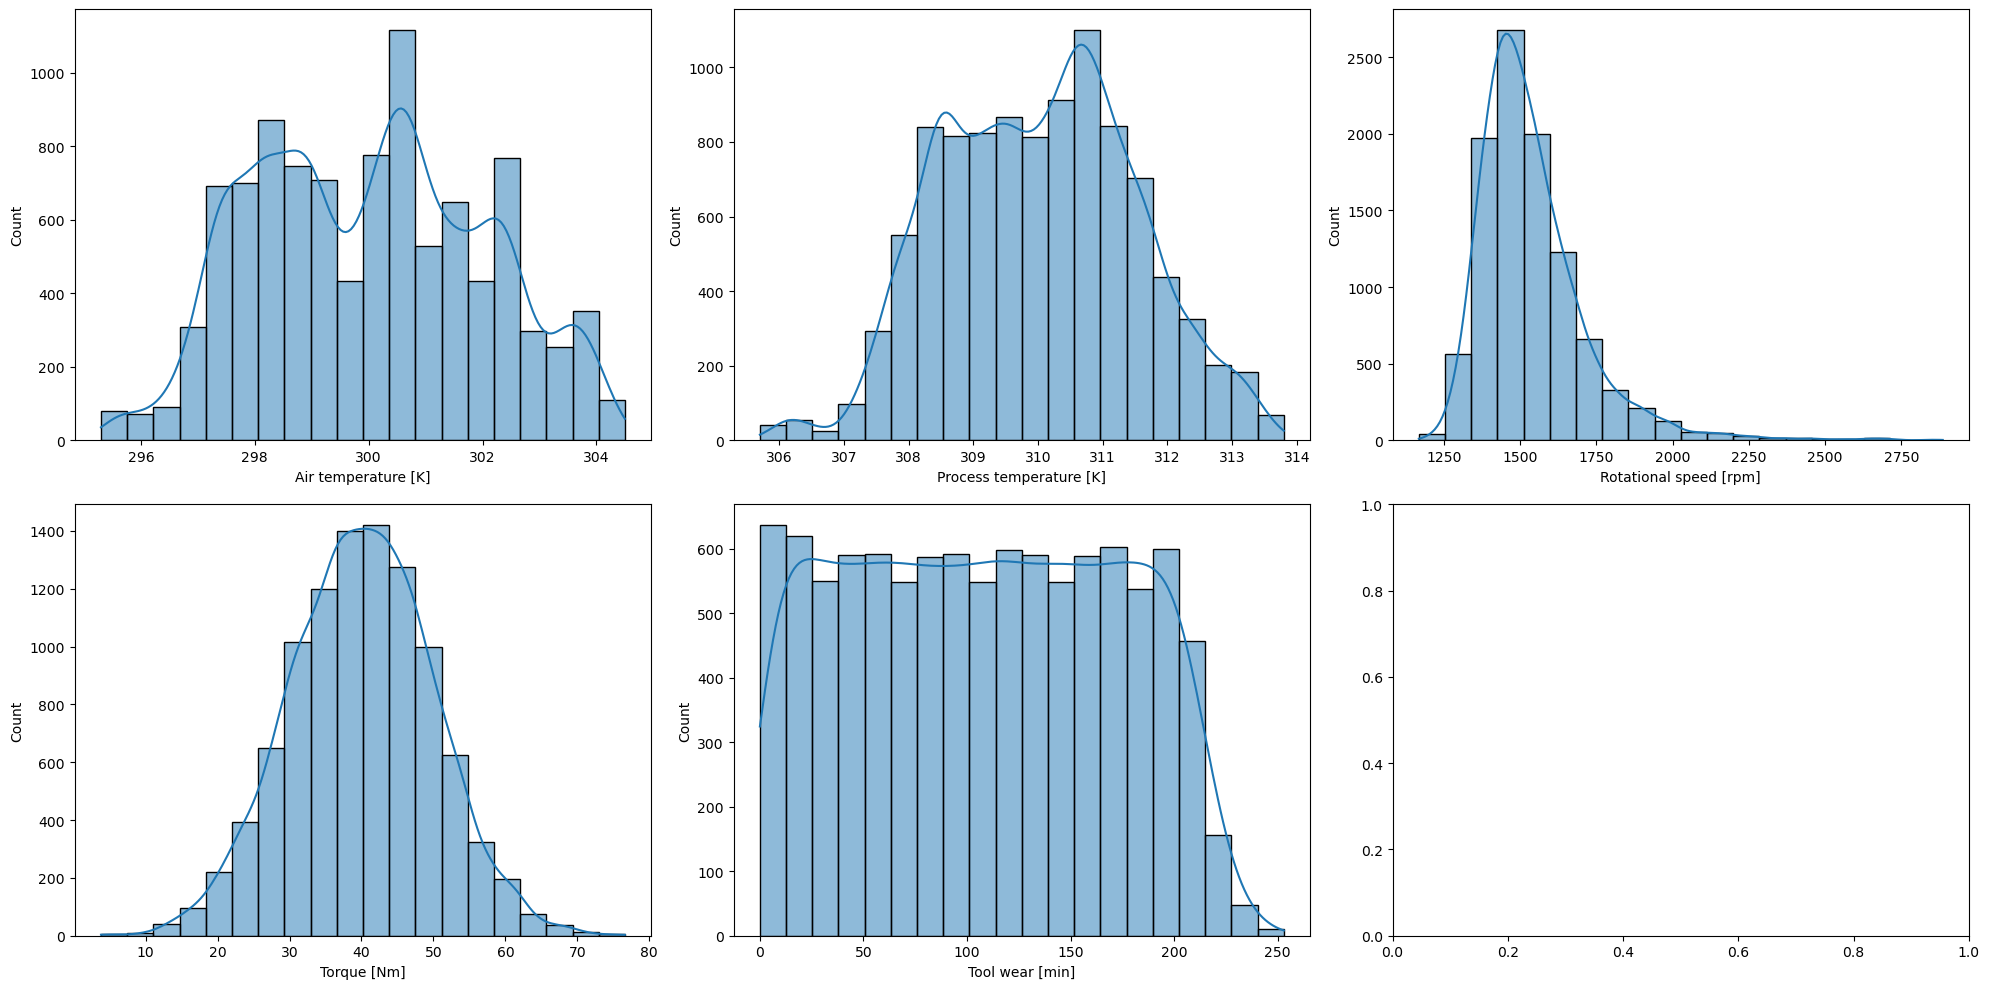

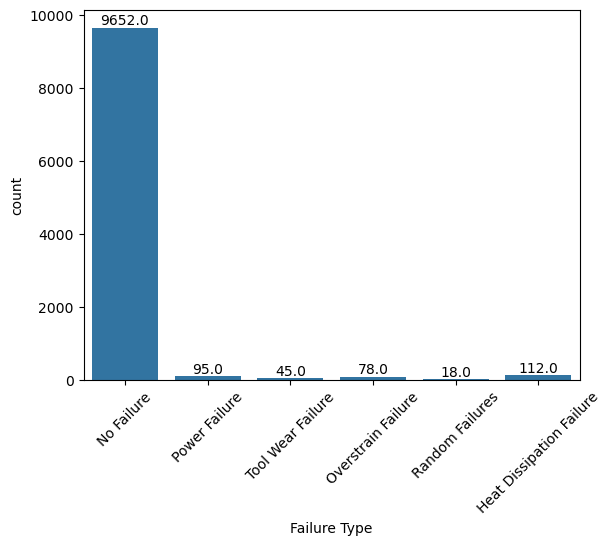

In [3]:
# List of input variables (features) for which we want to visualize distributions
Input_variables = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]
# Dependent features (target and failure type) - this is for future use but not directly visualized here
Dependent_Features = ["Target", "Failure Type"]



# Create a subplot grid with 2 rows and 3 columns to display histograms for each feature in Input_variables
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  
axes = axes.flatten()  # Flatten the 2D axes array into 1D for easier iteration

# Iterate through each input variable and plot its histogram with KDE
for i, feature in enumerate(Input_variables):
    # Plot a histogram with kernel density estimation (KDE) for the feature
    sns.histplot(data=df, kde=True, bins=20, x=feature, ax=axes[i])  
    # Set x-axis label for the current plot
    axes[i].set_xlabel(feature)

# Adjust layout to ensure all plots are neatly arranged without overlap
plt.tight_layout()  
# Show the plots
plt.show()


# Create a countplot for the 'Failure Type' column to visualize the distribution of failure types
ax = sns.countplot(data=df, x="Failure Type")

# Annotate the count values on top of the bars for better readability
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", va="bottom")

# Rotate x-axis labels to ensure they are readable
plt.xticks(rotation=45)
# Display the plot
plt.show()

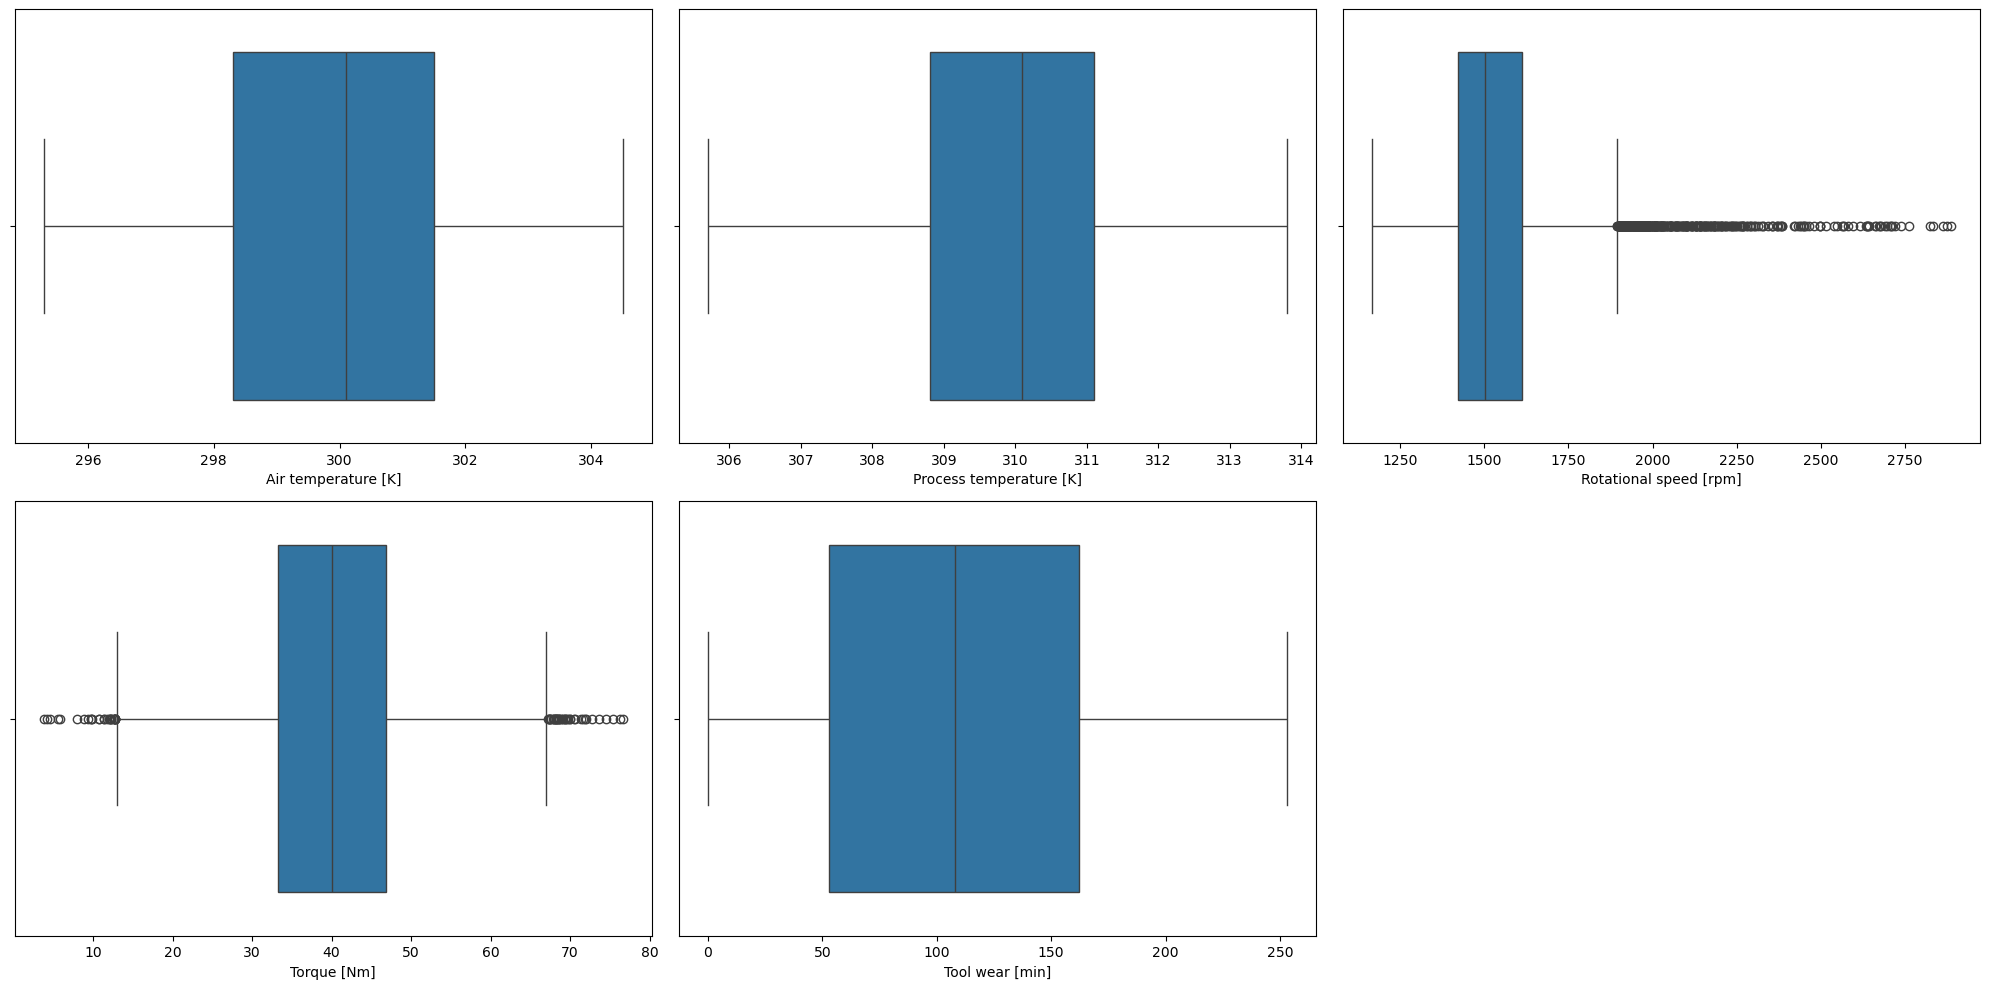

In [4]:
# Define the number of features and the grid dimensions (2 rows and 3 columns)
n_features = len(Input_variables)
rows, cols = 2, 3  

# Create a subplot grid for visualizing the features with boxplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))  
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

# Iterate through each input variable to visualize it with a boxplot
for i, feature in enumerate(Input_variables):
    # Check if the feature is numeric
    if pd.api.types.is_numeric_dtype(df[feature]):  
        # Plot a boxplot for numeric features
        sns.boxplot(data=df, x=feature, ax=axes[i])  
    else:
        # If the feature is non-numeric, display a text message on the plot
        axes[i].text(0.5, 0.5, "Non-numeric data", ha="center", va="center")
        axes[i].set_title(f"{feature} (Non-numeric)")  # Set the title indicating it's non-numeric

# Remove any unused axes (if there are more axes than features)
for j in range(len(Input_variables), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap of elements in the plots
plt.tight_layout()  
# Display the plots
plt.show()

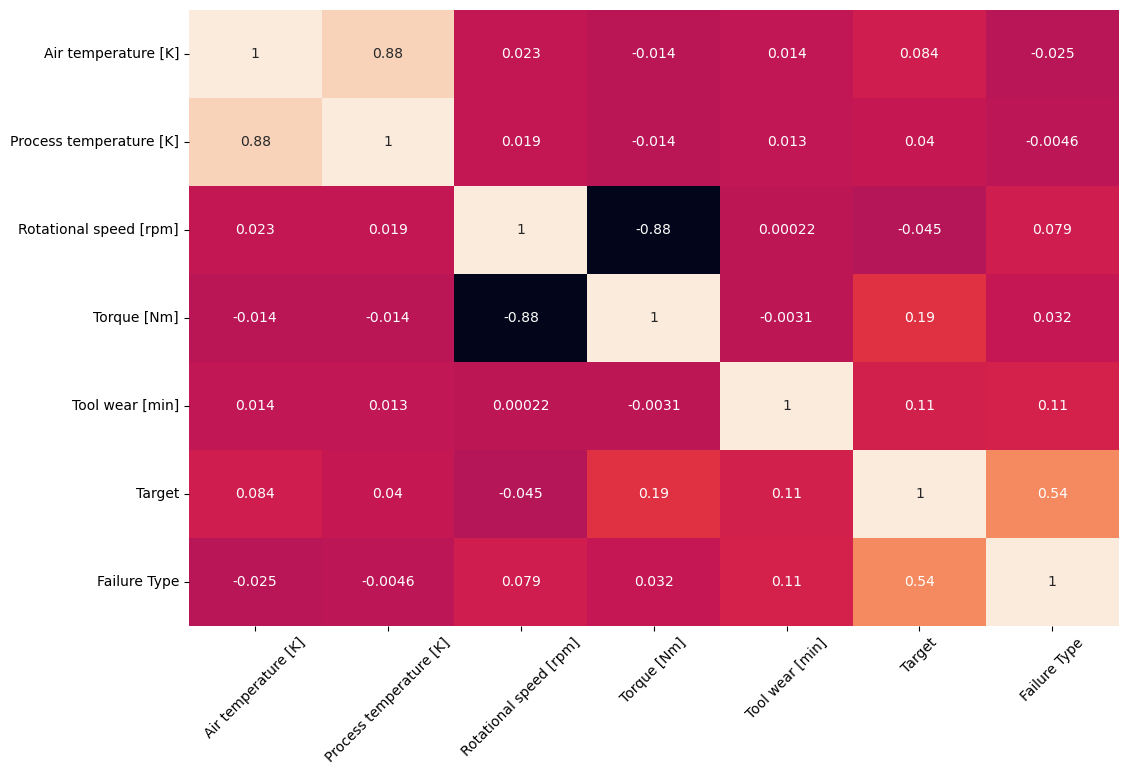

In [5]:
# Drop the 'Type' column as it's not needed for analysis
df = df.drop(columns=["Type"], axis=1)

# Retrieve the last column of the dataframe
last_column = df.columns[-1]

# Create a LabelEncoder instance to encode the last column into numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply label encoding to the last column
df[last_column] = le.fit_transform(df[last_column])


# Create a heatmap to visualize the correlation matrix of the dataset
plt.figure(figsize=(12, 8))  # Set the figure size for better clarity
sns.heatmap(df.corr(), annot=True, cbar=False)  # Display the correlation matrix with annotations and without color bar
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the heatmap


In [6]:
# Create a copy of the original (backup) dataframe
df_restored = df_backup.copy()

# Drop the 'Target' column as it's not needed for further analysis
df_restored = df_restored.drop(columns=["Target"], axis=1)


# Create a LabelEncoder instance
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply label encoding to the first column of the restored dataframe
df_restored[df_restored.columns[0]] = le.fit_transform(df_restored[df_restored.columns[0]])

# Apply label encoding to the last column of the restored dataframe
df_restored[df_restored.columns[-1]] = le.fit_transform(df_restored[df_restored.columns[-1]])

# Print the processed dataframe to verify changes
print(df_restored)


# Create a dataframe (df_1) containing only rows where 'Failure Type' is 1
df_1 = df_restored[df_restored["Failure Type"] == 1]
print(df_1)  # Display df_1 with Failure Type = 1

# Create a dataframe (df_2) containing rows where 'Failure Type' is not 1
df_2 = df_restored[df_restored["Failure Type"] != 1]
print(df_2)  # Display df_2 with Failure Type != 1

      Type  Air temperature [K]  Process temperature [K]  \
0        2                298.1                    308.6   
1        1                298.2                    308.7   
2        1                298.1                    308.5   
3        1                298.2                    308.6   
4        1                298.2                    308.7   
...    ...                  ...                      ...   
9995     2                298.8                    308.4   
9996     0                298.9                    308.4   
9997     2                299.0                    308.6   
9998     0                299.0                    308.7   
9999     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Failure Type  
0                       1551         42.8                0             1  
1                       1408         46.3                3             1  
2                       1498         49.4             

In [7]:
# Perform K-Means clustering on the dataframe df_1 (Failure Type = 1)
from sklearn.cluster import KMeans

# Initialize the KMeans model with 20 clusters and 10 initializations for each run
kmeans = KMeans(n_clusters=20, n_init=10, random_state=42)

# Fit the model and predict the clusters for the data
clusters = kmeans.fit_predict(df_1)

# Add the predicted cluster labels to the dataframe as a new column
df_1["cluster"] = clusters

# Print the updated dataframe with the cluster labels
print(df_1)


# Display the count of data points in each cluster
print(df_1['cluster'].value_counts())



# Function to sample a fraction of data points from each cluster
def sample_from_clusters(df, cluster_col, sample_frac):
    # Group the dataframe by the cluster column and sample the specified fraction from each cluster
    sampled_data = df.groupby(cluster_col).apply(lambda x: x.sample(frac=sample_frac))
    
    # Reset the index after sampling to maintain a clean structure
    sampled_data = sampled_data.reset_index(drop=True)
    
    return sampled_data

# Sample 5% of data from each cluster
sampled_df = sample_from_clusters(df_1, "cluster", 0.05)

# Drop the 'cluster' column from the sampled dataframe as it's no longer needed
sampled_df = sampled_df.drop(columns="cluster", axis=1)

# Print the final sampled dataframe
print(sampled_df)

      Type  Air temperature [K]  Process temperature [K]  \
0        2                298.1                    308.6   
1        1                298.2                    308.7   
2        1                298.1                    308.5   
3        1                298.2                    308.6   
4        1                298.2                    308.7   
...    ...                  ...                      ...   
9995     2                298.8                    308.4   
9996     0                298.9                    308.4   
9997     2                299.0                    308.6   
9998     0                299.0                    308.7   
9999     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Failure Type  \
0                       1551         42.8                0             1   
1                       1408         46.3                3             1   
2                       1498         49.4          

C:\Users\acer\AppData\Local\Temp\ipykernel_5396\3804158911.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["cluster"] = clusters
C:\Users\acer\AppData\Local\Temp\ipykernel_5396\3804158911.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = df.groupby(cluster_col).apply(lambda x: x.sample(frac=sample_frac))


In [8]:
# Concatenate the sampled data (from Failure Type 1 clusters) with the rest of the dataset (Failure Type != 1)
df = pd.concat([sampled_df, df_2])

# Print the concatenated dataframe
print(df)



# Fill any missing values (NaN) with 0s to ensure no missing data for model training
df = df.fillna(0)

# Print the dataframe after filling missing values
print(df)



# Define the feature matrix X (all columns except the last one) and target vector Y (the last column)
X = df.iloc[:, :-1].values  # Features
Y = df.iloc[:, -1].values   # Target



# Split the data into training (85%) and test (15%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

# Further split the training data into training (85% of 85%) and validation (15% of 85%) sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

      Type  Air temperature [K]  Process temperature [K]  \
0        2                298.3                    308.9   
1        1                297.4                    308.1   
2        2                300.3                    310.4   
3        1                298.1                    307.7   
4        2                300.1                    310.3   
...    ...                  ...                      ...   
9758     1                298.6                    309.8   
9764     1                298.5                    309.5   
9822     1                298.5                    309.4   
9830     1                298.3                    309.3   
9974     1                298.6                    308.2   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Failure Type  
0                       1363         46.1                5             1  
1                       1348         57.4               66             1  
2                       1293         49.7             

C:\Users\acer\AppData\Local\Temp\ipykernel_5396\1260855008.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Heat Dissipation", "No Failure", "Overstrain", "Power", "Tool Wear", "Random"])


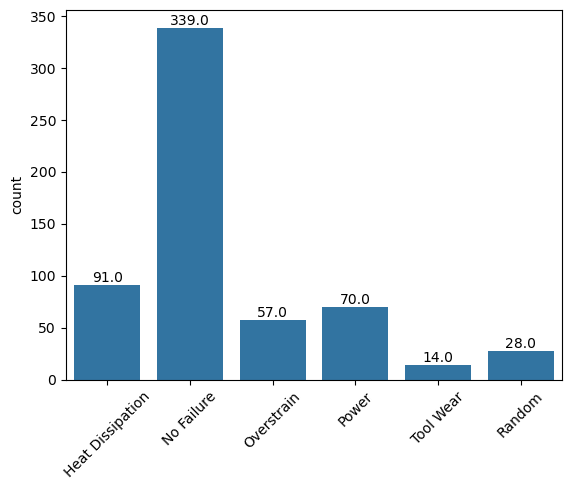

C:\Users\acer\AppData\Local\Temp\ipykernel_5396\1260855008.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Heat Dissipation", "No Failure", "Overstrain", "Power", "Tool Wear", "Random"])


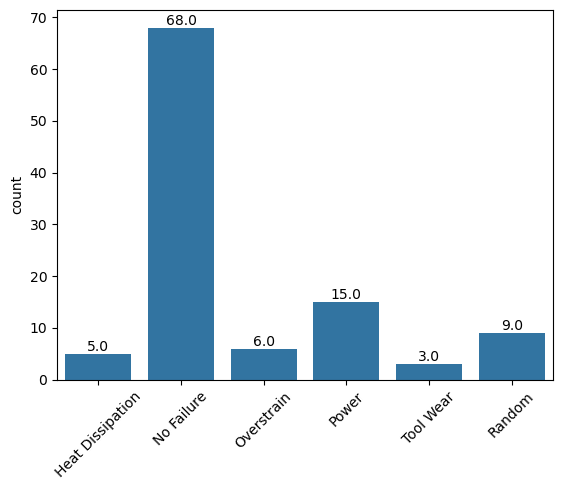

C:\Users\acer\AppData\Local\Temp\ipykernel_5396\1260855008.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Heat Dissipation", "No Failure", "Overstrain", "Power", "Tool Wear", "Random"])


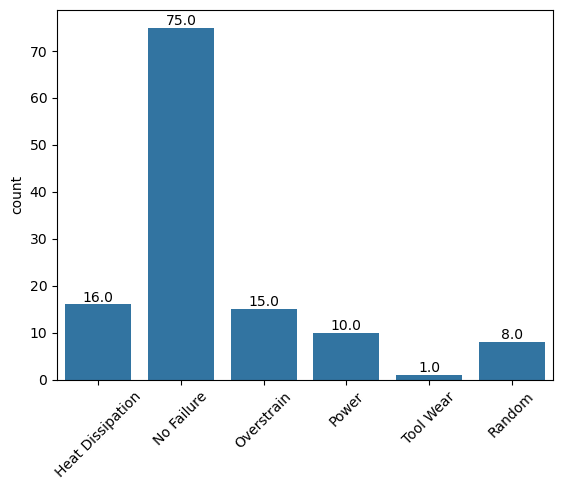

In [9]:


# Converting the training, validation, and test data into DataFrames for easy plotting
train_data = pd.DataFrame(Y_train)
val_data = pd.DataFrame(Y_val)
test_data = pd.DataFrame(Y_test)


# Creating a countplot to visualize the distribution of the target variable in the training set
ax = sns.countplot(data=train_data, x=Y_train)

# Annotating the bars with the count values for each class
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom")

# Customizing x-axis labels to represent the classes of the target variable
ax.set_xticklabels(["Heat Dissipation", "No Failure", "Overstrain", "Power", "Tool Wear", "Random"])

# Rotating the x-axis labels to make them more readable
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


# Creating a countplot to visualize the distribution of the target variable in the validation set
ax = sns.countplot(data=val_data, x=Y_val)

# Annotating the bars with the count values for each class
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom")

# Customizing x-axis labels to represent the classes of the target variable
ax.set_xticklabels(["Heat Dissipation", "No Failure", "Overstrain", "Power", "Tool Wear", "Random"])

# Rotating the x-axis labels to make them more readable
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


# Creating a countplot to visualize the distribution of the target variable in the test set
ax = sns.countplot(data=test_data, x=Y_test)

# Annotating the bars with the count values for each class
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom")

# Customizing x-axis labels to represent the classes of the target variable
ax.set_xticklabels(["Heat Dissipation", "No Failure", "Overstrain", "Power", "Tool Wear", "Random"])

# Rotating the x-axis labels to make them more readable
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


In [10]:
# Importing StandardScaler for Data Normalization 
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler Object 
# StandardScaler standardizes features by removing the mean and scaling to unit variance
SC = StandardScaler()

#  Scaling the Training Data 
# Fit the scaler to the training data and transform the training data
X_train_sc = SC.fit_transform(X_train)

# Scaling the Test Data 
# Transform the test data using the already fitted scaler (no fitting on test data)
X_test_sc = SC.transform(X_test)

# Scaling the Validation Data 
# Transform the validation data using the already fitted scaler (no fitting on validation data)
X_val_sc = SC.transform(X_val)


In [11]:
# Importing and Training Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with a fixed random state for reproducibility
logistic = LogisticRegression(random_state=42)

# Train the model on the training data (X_train_sc and Y_train)
logistic.fit(X_train_sc, Y_train)

# Importing and Training K-Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors model with 5 neighbors
K_NN = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data (X_train_sc and Y_train)
K_NN.fit(X_train_sc, Y_train)

# Importing and Training Support Vector Machine (SVM) Model
from sklearn.svm import SVC

# Initialize the Support Vector Machine (SVM) model with a linear kernel and a fixed random state
svc = SVC(kernel="linear", random_state=42)

# Train the model on the training data (X_train_sc and Y_train)
svc.fit(X_train_sc, Y_train)

# Importing and Training Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model (Gaussian Naive Bayes)
NB = GaussianNB()

# Train the model on the training data (X_train_sc and Y_train)
NB.fit(X_train_sc, Y_train)

# Importing and Training Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier with the "entropy" criterion and a fixed random state
DTC = DecisionTreeClassifier(criterion="entropy", random_state=42)

# Train the model on the training data (X_train_sc and Y_train)
DTC.fit(X_train_sc, Y_train)

# Importing and Training Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier with 10 trees and "entropy" as the criterion
RFC = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=42)

# Train the model on the training data (X_train_sc and Y_train)
RFC.fit(X_train_sc, Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [12]:
# Logistic Regression Model Evaluation on Validation Set
# Predicting the labels for the validation data using Logistic Regression
Y_val_pred_logistic = logistic.predict(X_val_sc)

# Calculating accuracy for Logistic Regression on the validation set
from sklearn.metrics import accuracy_score
accuracy_val_logistic = accuracy_score(Y_val, Y_val_pred_logistic)
print(f'Logistic Regression accuracy_score: {accuracy_val_logistic:.2f}')

# Confusion Matrix for Logistic Regression on the validation set
from sklearn.metrics import confusion_matrix
cm_val_logistic = confusion_matrix(Y_val, Y_val_pred_logistic)
print(f'Logistic Regression confusion_matrix:\n{cm_val_logistic}')


# K-Nearest Neighbors Model Evaluation on Validation Set
# Predicting the labels for the validation data using K-Nearest Neighbors
Y_val_pred_K_NN = K_NN.predict(X_val_sc)

# Calculating accuracy for K-Nearest Neighbors on the validation set
accuracy_val_K_NN = accuracy_score(Y_val, Y_val_pred_K_NN)
print(f'K-Nearest Neighbors accuracy_score: {accuracy_val_K_NN:.2f}')

# Confusion Matrix for K-Nearest Neighbors on the validation set
cm_val_K_NN = confusion_matrix(Y_val, Y_val_pred_K_NN)
print(f'K-Nearest Neighbors confusion_matrix:\n{cm_val_K_NN}')


# Support Vector Machine Model Evaluation on Validation Set
# Predicting the labels for the validation data using Support Vector Machine
Y_val_pred_svc = svc.predict(X_val_sc)

# Calculating accuracy for Support Vector Machine on the validation set
accuracy_val_svc = accuracy_score(Y_val, Y_val_pred_svc)
print(f'Support Vector Machine accuracy_score: {accuracy_val_svc:.2f}')

# Confusion Matrix for Support Vector Machine on the validation set
cm_val_svc = confusion_matrix(Y_val, Y_val_pred_svc)
print(f'Support Vector Machine confusion_matrix:\n{cm_val_svc}')


# Decision Tree Classification Model Evaluation on Validation Set
# Predicting the labels for the validation data using Decision Tree Classification
Y_val_pred_DTC = DTC.predict(X_val_sc)

# Calculating accuracy for Decision Tree Classification on the validation set
accuracy_val_DTC = accuracy_score(Y_val, Y_val_pred_DTC)
print(f'Decision Tree Classification accuracy_score: {accuracy_val_DTC:.2f}')

# Confusion Matrix for Decision Tree Classification on the validation set
cm_val_DTC = confusion_matrix(Y_val, Y_val_pred_DTC)
print(f'Decision Tree Classification confusion_matrix:\n{cm_val_DTC}')


# Random Forest Classification Model Evaluation on Validation Set
# Predicting the labels for the validation data using Random Forest Classification
Y_val_pred_RFC = RFC.predict(X_val_sc)

# Calculating accuracy for Random Forest Classification on the validation set
accuracy_val_RFC = accuracy_score(Y_val, Y_val_pred_RFC)
print(f'Random Forest Classification accuracy_score: {accuracy_val_RFC:.2f}')

# Confusion Matrix for Random Forest Classification on the validation set
cm_val_RFC = confusion_matrix(Y_val, Y_val_pred_RFC)
print(f'Random Forest Classification confusion_matrix:\n{cm_val_RFC}')


# Naive Bayes Model Evaluation on Validation Set
# Predicting the labels for the validation data using Naive Bayes
Y_val_pred_NB = NB.predict(X_val_sc)

# Calculating accuracy for Naive Bayes on the validation set
accuracy_val_NB = accuracy_score(Y_val, Y_val_pred_NB)
print(f'Naive Bayes accuracy_score: {accuracy_val_NB:.2f}')

# Confusion Matrix for Naive Bayes on the validation set
cm_val_NB = confusion_matrix(Y_val, Y_val_pred_NB)
print(f'Naive Bayes confusion_matrix:\n{cm_val_NB}')


Logistic Regression accuracy_score: 0.86
Logistic Regression confusion_matrix:
[[ 5  0  0  0  0  0]
 [ 1 65  1  0  0  1]
 [ 0  0  6  0  0  0]
 [ 0  1  0 14  0  0]
 [ 0  3  0  0  0  0]
 [ 0  5  3  0  0  1]]
K-Nearest Neighbors accuracy_score: 0.76
K-Nearest Neighbors confusion_matrix:
[[ 4  1  0  0  0  0]
 [ 3 63  0  1  0  1]
 [ 1  0  5  0  0  0]
 [ 3  2  1  9  0  0]
 [ 0  3  0  0  0  0]
 [ 1  8  0  0  0  0]]
Support Vector Machine accuracy_score: 0.85
Support Vector Machine confusion_matrix:
[[ 5  0  0  0  0  0]
 [ 1 63  2  0  0  2]
 [ 0  0  6  0  0  0]
 [ 0  1  0 14  0  0]
 [ 0  3  0  0  0  0]
 [ 0  3  4  0  0  2]]
Decision Tree Classification accuracy_score: 0.86
Decision Tree Classification confusion_matrix:
[[ 5  0  0  0  0  0]
 [ 0 64  0  0  1  3]
 [ 0  2  4  0  0  0]
 [ 1  1  1 12  0  0]
 [ 0  3  0  0  0  0]
 [ 0  2  1  0  0  6]]
Random Forest Classification accuracy_score: 0.82
Random Forest Classification confusion_matrix:
[[ 5  0  0  0  0  0]
 [ 1 62  0  0  0  5]
 [ 0  2  4  0

In [13]:
# Logistic Regression Model Evaluation
# Predicting the labels for the test data using Logistic Regression
Y_pred_logistic = logistic.predict(X_test_sc)

# Calculating accuracy for Logistic Regression
from sklearn.metrics import accuracy_score
accuracy_logistic = accuracy_score(Y_test, Y_pred_logistic)
print(f'Logistic Regression accuracy_score: {accuracy_logistic:.2f}')

# Confusion Matrix for Logistic Regression
from sklearn.metrics import confusion_matrix
cm_logistic = confusion_matrix(Y_test, Y_pred_logistic)
print(f'Logistic Regression confusion_matrix:\n{cm_logistic}')


# K-Nearest Neighbors Model Evaluation
# Predicting the labels for the test data using K-Nearest Neighbors
Y_pred_K_NN = K_NN.predict(X_test_sc)

# Calculating accuracy for K-Nearest Neighbors
accuracy_K_NN = accuracy_score(Y_test, Y_pred_K_NN)
print(f'K-Nearest Neighbors accuracy_score: {accuracy_K_NN:.2f}')

# Confusion Matrix for K-Nearest Neighbors
cm_K_NN = confusion_matrix(Y_test, Y_pred_K_NN)
print(f'K-Nearest Neighbors confusion_matrix:\n{cm_K_NN}')


# Support Vector Machine Model Evaluation
# Predicting the labels for the test data using Support Vector Machine
Y_pred_svc = svc.predict(X_test_sc)

# Calculating accuracy for Support Vector Machine
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
print(f'Support Vector Machine accuracy_score: {accuracy_svc:.2f}')

# Confusion Matrix for Support Vector Machine
cm_svc = confusion_matrix(Y_test, Y_pred_svc)
print(f'Support Vector Machine confusion_matrix:\n{cm_svc}')


# Decision Tree Classification Model Evaluation
# Predicting the labels for the test data using Decision Tree Classification
Y_pred_DTC = DTC.predict(X_test_sc)

# Calculating accuracy for Decision Tree Classification
accuracy_DTC = accuracy_score(Y_test, Y_pred_DTC)
print(f'Decision Tree Classification accuracy_score: {accuracy_DTC:.2f}')

# Confusion Matrix for Decision Tree Classification
cm_DTC = confusion_matrix(Y_test, Y_pred_DTC)
print(f'Decision Tree Classification confusion_matrix:\n{cm_DTC}')


# Random Forest Classification Model Evaluation
# Predicting the labels for the test data using Random Forest Classification
Y_pred_RFC = RFC.predict(X_test_sc)

# Calculating accuracy for Random Forest Classification
accuracy_RFC = accuracy_score(Y_test, Y_pred_RFC)
print(f'Random Forest Classification accuracy_score: {accuracy_RFC:.2f}')

# Confusion Matrix for Random Forest Classification
cm_RFC = confusion_matrix(Y_test, Y_pred_RFC)
print(f'Random Forest Classification confusion_matrix:\n{cm_RFC}')


# Naive Bayes Model Evaluation
# Predicting the labels for the test data using Naive Bayes
Y_pred_NB = NB.predict(X_test_sc)

# Calculating accuracy for Naive Bayes
accuracy_NB = accuracy_score(Y_test, Y_pred_NB)
print(f'Naive Bayes accuracy_score: {accuracy_NB:.2f}')

# Confusion Matrix for Naive Bayes
cm_NB = confusion_matrix(Y_test, Y_pred_NB)
print(f'Naive Bayes confusion_matrix:\n{cm_NB}')


Logistic Regression accuracy_score: 0.92
Logistic Regression confusion_matrix:
[[16  0  0  0  0  0]
 [ 1 74  0  0  0  0]
 [ 0  0 15  0  0  0]
 [ 2  0  0  8  0  0]
 [ 0  1  0  0  0  0]
 [ 0  6  0  0  0  2]]
K-Nearest Neighbors accuracy_score: 0.76
K-Nearest Neighbors confusion_matrix:
[[13  2  0  1  0  0]
 [ 6 66  1  1  0  1]
 [ 1  1 13  0  0  0]
 [ 5  1  1  3  0  0]
 [ 1  0  0  0  0  0]
 [ 0  6  1  1  0  0]]
Support Vector Machine accuracy_score: 0.89
Support Vector Machine confusion_matrix:
[[16  0  0  0  0  0]
 [ 1 72  0  1  0  1]
 [ 0  0 15  0  0  0]
 [ 1  0  2  7  0  0]
 [ 0  1  0  0  0  0]
 [ 1  6  0  0  0  1]]
Decision Tree Classification accuracy_score: 0.89
Decision Tree Classification confusion_matrix:
[[15  0  1  0  0  0]
 [ 0 74  0  0  0  1]
 [ 0  3 12  0  0  0]
 [ 2  0  1  7  0  0]
 [ 0  1  0  0  0  0]
 [ 0  3  0  1  1  3]]
Random Forest Classification accuracy_score: 0.91
Random Forest Classification confusion_matrix:
[[15  0  0  1  0  0]
 [ 0 73  1  0  0  1]
 [ 0  2 13  0

C:\Users\acer\AppData\Local\Temp\ipykernel_5396\2044194667.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\acer\AppData\Local\Temp\ipykernel_5396\2044194667.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


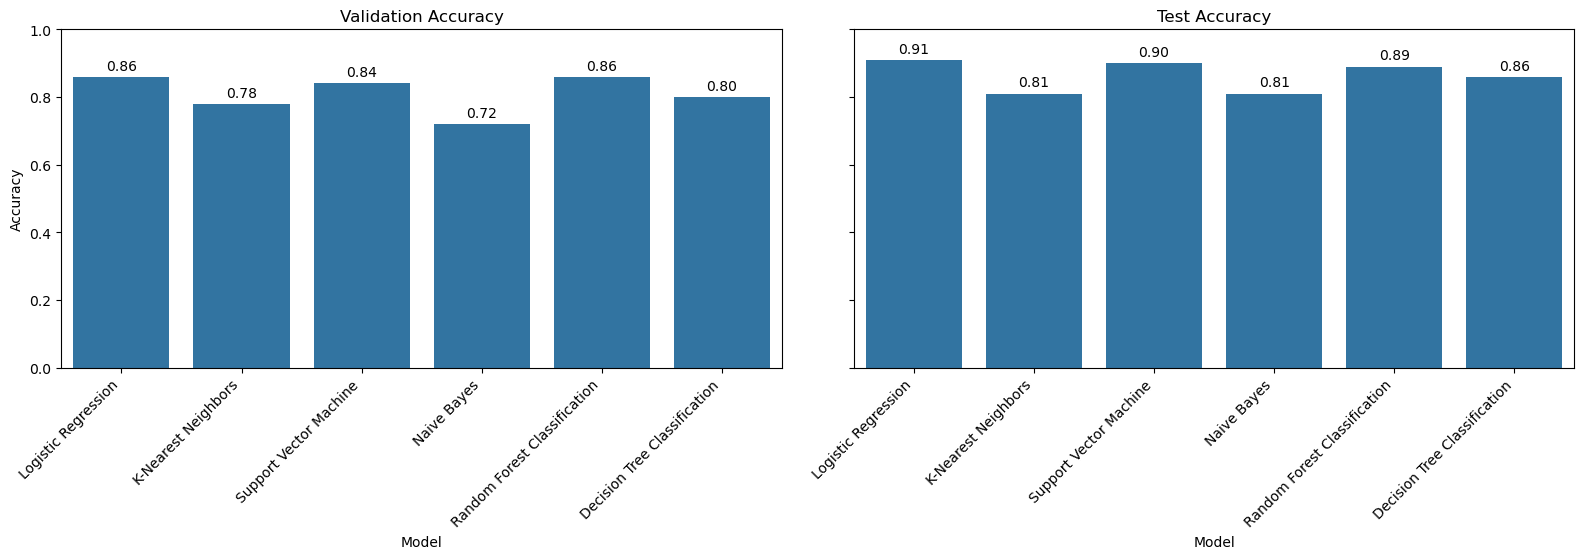

In [14]:
# Data for Model Validation and Test Accuracy
validation_data = {
    "Model": [
        'Logistic Regression', 
        'K-Nearest Neighbors', 
        'Support Vector Machine', 
        'Naive Bayes', 
        'Random Forest Classification', 
        'Decision Tree Classification'
    ],
    "Accuracy": [0.86, 0.78, 0.84, 0.72, 0.86, 0.80]  # Validation accuracy for each model
}

test_data = {
    "Model": [
        'Logistic Regression', 
        'K-Nearest Neighbors', 
        'Support Vector Machine', 
        'Naive Bayes', 
        'Random Forest Classification', 
        'Decision Tree Classification'
    ],
    "Accuracy": [0.91, 0.81, 0.90, 0.81, 0.89, 0.86]  # Test accuracy for each model
}

# Convert the data into Pandas DataFrames for easier handling
validation_df = pd.DataFrame(validation_data)
test_df = pd.DataFrame(test_data)

# Plotting the comparison between validation and test accuracy
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Create two side-by-side subplots

# Plot for Validation Accuracy
ax1 = sns.barplot(y="Accuracy", x="Model", data=validation_df, ax=axes[0])  # Validation accuracy bar plot
ax1.set_title("Validation Accuracy")  # Title for validation accuracy plot
ax1.set_ylim(0, 1)  # Set the y-axis range from 0 to 1 for accuracy
# Annotate each bar with the accuracy value
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', 
                 fontsize=10, color='black', 
                 xytext=(0, 8), textcoords='offset points')

# Plot for Test Accuracy
ax2 = sns.barplot(y="Accuracy", x="Model", data=test_df, ax=axes[1])  # Test accuracy bar plot
ax2.set_title("Test Accuracy")  # Title for test accuracy plot
ax2.set_ylim(0, 1)  # Set the y-axis range from 0 to 1 for accuracy
# Annotate each bar with the accuracy value
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', 
                 fontsize=10, color='black', 
                 xytext=(0, 8), textcoords='offset points')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust the layout to prevent title clipping
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()  # Display the plots


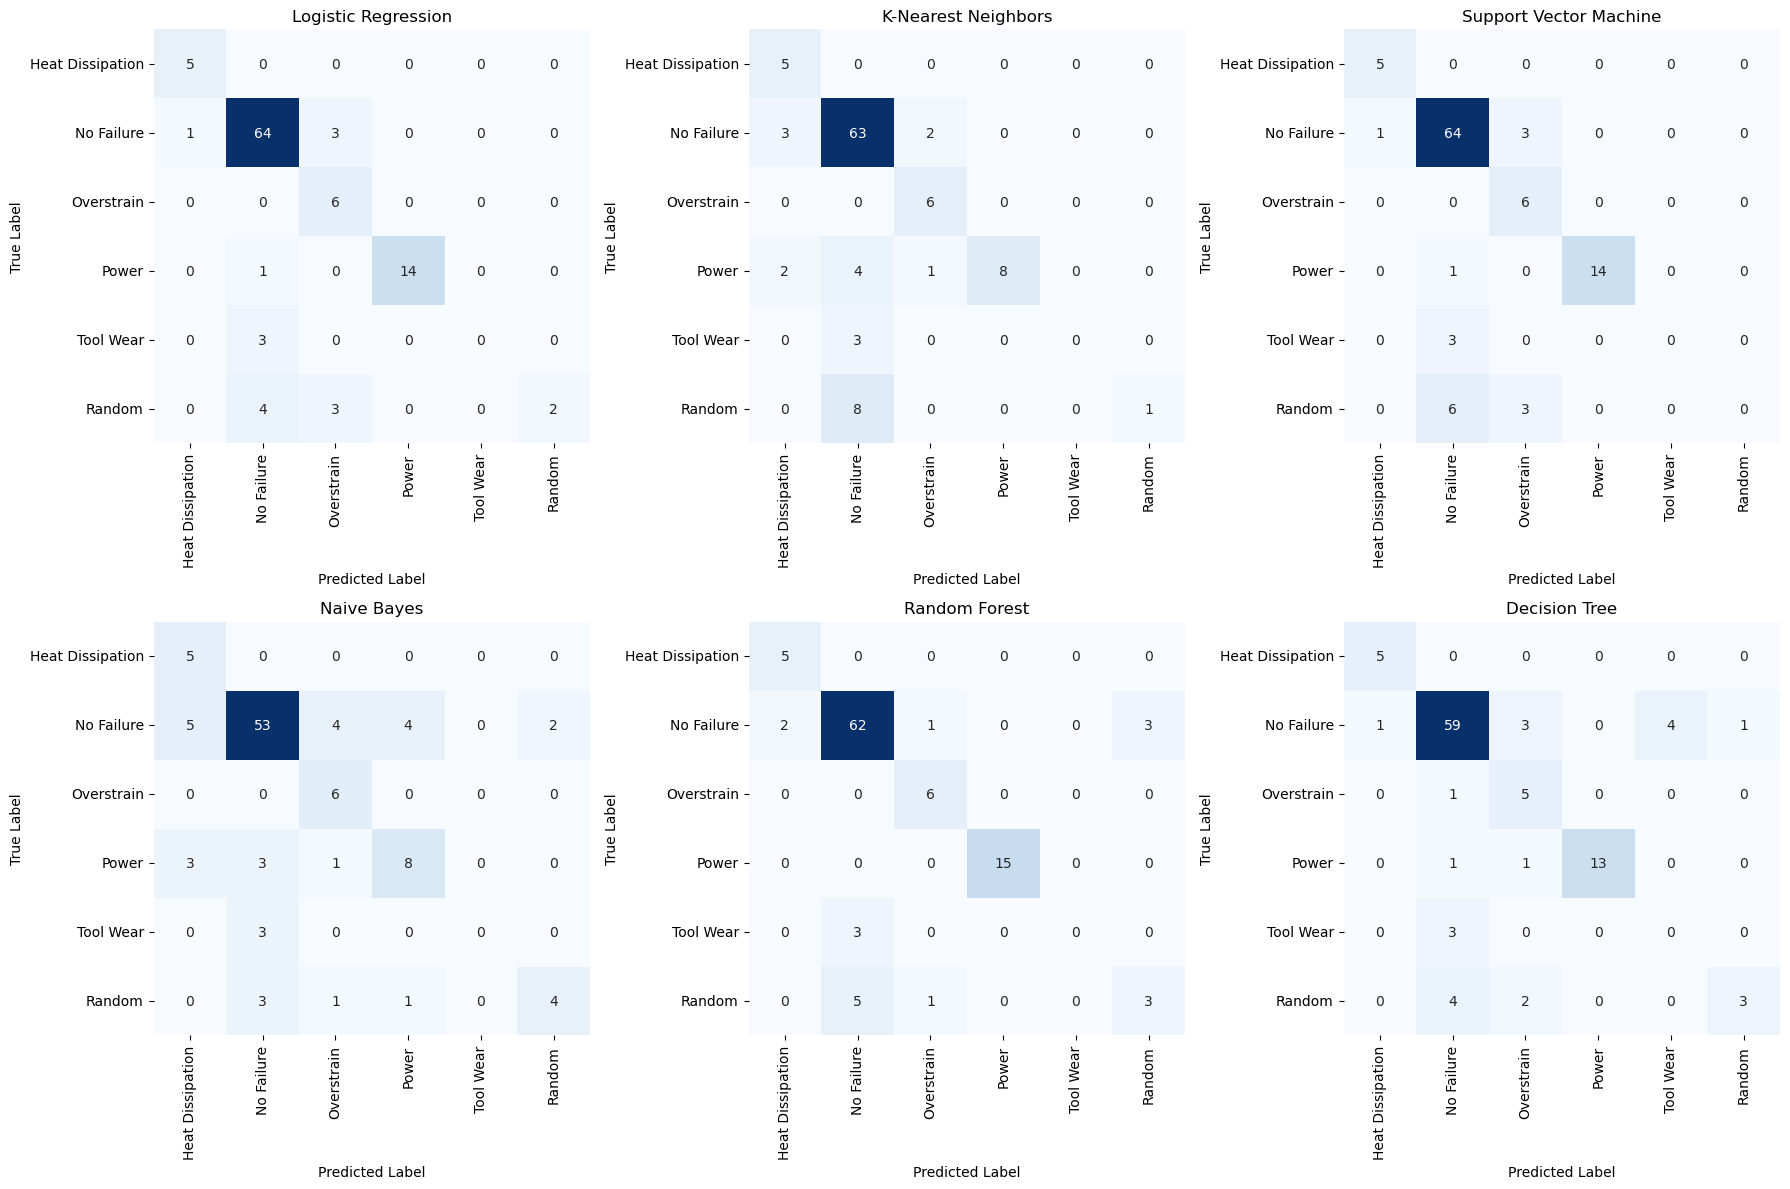

In [15]:
# Define the confusion matrices.
logistic_regression_cm = np.array([[ 5,  0,  0,  0,  0,  0],
                                   [ 1, 64,  3,  0,  0,  0],
                                   [ 0,  0,  6,  0,  0,  0],
                                   [ 0,  1,  0, 14,  0,  0],
                                   [ 0,  3,  0,  0,  0,  0],
                                   [ 0,  4,  3,  0,  0,  2]])

knn_cm = np.array([[ 5,  0,  0,  0,  0,  0],
                   [ 3, 63,  2,  0,  0,  0],
                   [ 0,  0,  6,  0,  0,  0],
                   [ 2,  4,  1,  8,  0,  0],
                   [ 0,  3,  0,  0,  0,  0],
                   [ 0,  8,  0,  0,  0,  1]])

svm_cm = np.array([[ 5,  0,  0,  0,  0,  0],
                   [ 1, 64,  3,  0,  0,  0],
                   [ 0,  0,  6,  0,  0,  0],
                   [ 0,  1,  0, 14,  0,  0],
                   [ 0,  3,  0,  0,  0,  0],
                   [ 0,  6,  3,  0,  0,  0]])

naive_bayes_cm = np.array([[ 5,  0,  0,  0,  0,  0],
                           [ 5, 53,  4,  4,  0,  2],
                           [ 0,  0,  6,  0,  0,  0],
                           [ 3,  3,  1,  8,  0,  0],
                           [ 0,  3,  0,  0,  0,  0],
                           [ 0,  3,  1,  1,  0,  4]])

random_forest_cm = np.array([[ 5,  0,  0,  0,  0,  0],
                             [ 2, 62,  1,  0,  0,  3],
                             [ 0,  0,  6,  0,  0,  0],
                             [ 0,  0,  0, 15,  0,  0],
                             [ 0,  3,  0,  0,  0,  0],
                             [ 0,  5,  1,  0,  0,  3]])

decision_tree_cm = np.array([[ 5,  0,  0,  0,  0,  0],
                             [ 1, 59,  3,  0,  4,  1],
                             [ 0,  1,  5,  0,  0,  0],
                             [ 0,  1,  1, 13,  0,  0],
                             [ 0,  3,  0,  0,  0,  0],
                             [ 0,  4,  2,  0,  0,  3]])

# List of classifiers and confusion matrices
classifiers = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 
               'Naive Bayes', 'Random Forest', 'Decision Tree']

cms = [logistic_regression_cm, knn_cm, svm_cm, naive_bayes_cm, random_forest_cm, decision_tree_cm]

# Labels for the classes
labels = ['Heat Dissipation', 'No Failure', 'Overstrain', 'Power', 'Tool Wear', 'Random']

# Plotting the heatmaps for each confusion matrix
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Create a 2x3 grid of subplots
axes = axes.flatten()  # Flatten to iterate through axes

# Loop through classifiers and their confusion matrices
for i, (cm, classifier) in enumerate(zip(cms, classifiers)):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, 
                ax=axes[i], cbar=False)  # Plot confusion matrix as a heatmap
    axes[i].set_title(f'{classifier}')  # Title for each subplot
    axes[i].set_xlabel('Predicted Label')  # X-axis label
    axes[i].set_ylabel('True Label')  # Y-axis label

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()  # Show the plot


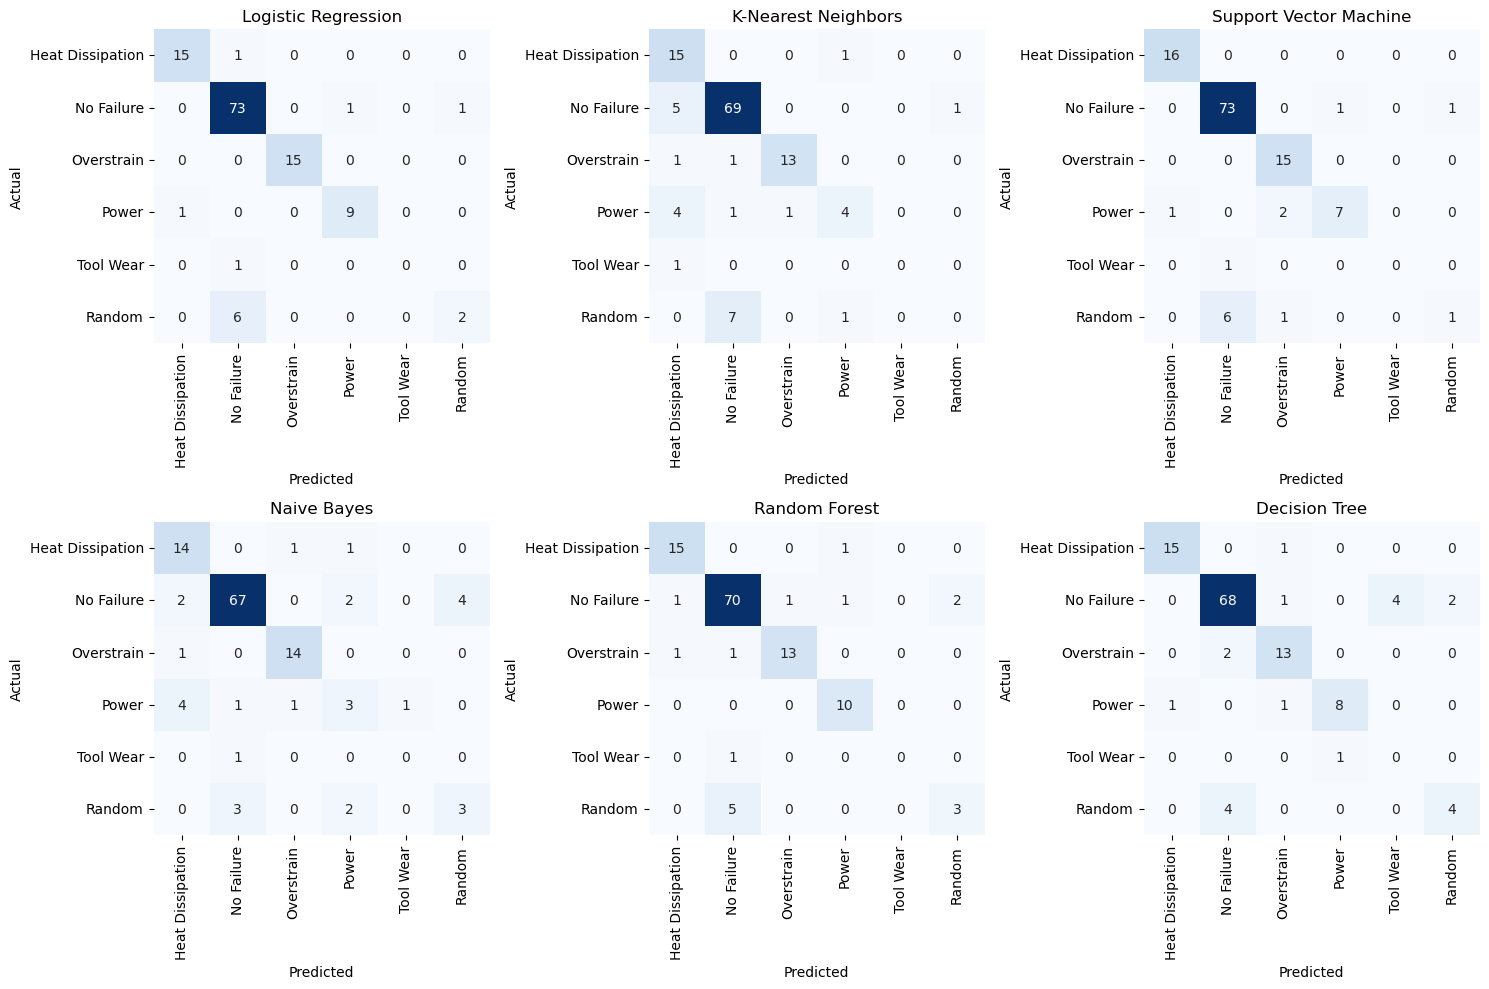

In [16]:



# Define the confusion matrices.
logistic_regression_cm = np.array([[15, 1, 0, 0, 0, 0],
                                   [0, 73, 0, 1, 0, 1],
                                   [0, 0, 15, 0, 0, 0],
                                   [1, 0, 0, 9, 0, 0],
                                   [0, 1, 0, 0, 0, 0],
                                   [0, 6, 0, 0, 0, 2]])

knn_cm = np.array([[15, 0, 0, 1, 0, 0],
                   [5, 69, 0, 0, 0, 1],
                   [1, 1, 13, 0, 0, 0],
                   [4, 1, 1, 4, 0, 0],
                   [1, 0, 0, 0, 0, 0],
                   [0, 7, 0, 1, 0, 0]])

svm_cm = np.array([[16, 0, 0, 0, 0, 0],
                   [0, 73, 0, 1, 0, 1],
                   [0, 0, 15, 0, 0, 0],
                   [1, 0, 2, 7, 0, 0],
                   [0, 1, 0, 0, 0, 0],
                   [0, 6, 1, 0, 0, 1]])

naive_bayes_cm = np.array([[14, 0, 1, 1, 0, 0],
                            [2, 67, 0, 2, 0, 4],
                            [1, 0, 14, 0, 0, 0],
                            [4, 1, 1, 3, 1, 0],
                            [0, 1, 0, 0, 0, 0],
                            [0, 3, 0, 2, 0, 3]])

random_forest_cm = np.array([[15, 0, 0, 1, 0, 0],
                              [1, 70, 1, 1, 0, 2],
                              [1, 1, 13, 0, 0, 0],
                              [0, 0, 0, 10, 0, 0],
                              [0, 1, 0, 0, 0, 0],
                              [0, 5, 0, 0, 0, 3]])

decision_tree_cm = np.array([[15, 0, 1, 0, 0, 0],
                             [0, 68, 1, 0, 4, 2],
                             [0, 2, 13, 0, 0, 0],
                             [1, 0, 1, 8, 0, 0],
                             [0, 0, 0, 1, 0, 0],
                             [0, 4, 0, 0, 0, 4]])

# List of classifiers and their respective confusion matrices
classifiers = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 
               'Naive Bayes', 'Random Forest', 'Decision Tree']

confusion_matrices = [logistic_regression_cm, knn_cm, svm_cm, naive_bayes_cm, 
                      random_forest_cm, decision_tree_cm]

# Define the labels for the confusion matrix categories
labels = ['Heat Dissipation', 'No Failure', 'Overstrain', 'Power', 'Tool Wear', 'Random']



# Create subplots for displaying confusion matrices of each classifier
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  

# Iterate over the classifiers and confusion matrices to generate heatmaps
for i, (cm, classifier) in enumerate(zip(confusion_matrices, classifiers)):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[i], cbar=False)
    axes[i].set_title(f'{classifier}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

# Adjust the layout for better presentation
plt.tight_layout()
plt.show()
